In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
df=pd.read_csv('train_titanic.csv')
df=df[['Age','Fare','Survived']]

In [8]:
df.sample(5)

,Age,Fare,Survived
839,NaN,29.7000,1
710,24.0,49.5042,1
523,44.0,57.9792,1
284,NaN,26.0000,0
672,70.0,10.5000,0


In [ ]:
#mean median imputation

In [9]:
import random
fare1=list()
for i in df.iloc[:,1]:
  if i<30 and i>25:
    fare1.append(np.nan)
  else:
    fare1.append(i)
fare1=pd.Series(fare1)

In [10]:
df['fare_changed']= fare1

In [11]:
df=df.drop(columns=['Fare'])

In [12]:
df.sample(5)

,Age,Survived,fare_changed
288,42.0,1,13.0000
704,26.0,0,7.8542
789,46.0,0,79.2000
584,NaN,0,8.7125
432,42.0,1,NaN


In [13]:
df.isnull().mean()*100

Age             19.865320
Survived         0.000000
fare_changed    10.549944
dtype: float64

In [14]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
X_train.shape,X_test.shape

((712, 2), (179, 2))

In [22]:
X_train.isnull().mean()

Age             0.207865
fare_changed    0.109551
dtype: float64

In [23]:
#this is we done by using pandas
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['fare_changed'].mean()
median_fare=X_train['fare_changed'].median()

In [24]:
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)

X_train['Fare_mean']=X_train['fare_changed'].fillna(mean_fare)
X_train['Fare_median']=X_train['fare_changed'].fillna(median_fare)


In [29]:
X_train.sample(5)

,Age,fare_changed,Age_mean,Age_median,Fare_mean,Fare_median
270,NaN,31.0000,29.785904,28.75,31.000000,31.0000
323,22.0,NaN,22.000000,22.00,32.947101,13.0000
722,34.0,13.0000,34.000000,34.00,13.000000,13.0000
838,32.0,56.4958,32.000000,32.00,56.495800,56.4958
349,42.0,8.6625,42.000000,42.00,8.662500,8.6625


In [31]:
#we see what changes comes in variance
#as when we replace with mean median more values of them comes so var got less-
#-as more centre values comes

#variance always shrinks so we need to care about that should not be more -
#-shrinked

print('original age var',X_train['Age'].var())
print('changed age_mean var',X_train['Age_mean'].var())
print('changed age_median var',X_train['Age_median'].var())

print('original fare var',X_train['fare_changed'].var())
print('changed fare_mean var',X_train['Fare_mean'].var())
print('changed fare_median var',X_train['Fare_median'].var())

#age varies a lot beacuse 20%data was missing

original age var 204.34951339046142
changed age_mean var 161.81262452718676
changed age_median var 161.98956633460548
original fare var 2655.9376950201095
changed fare_mean var 2364.569002739422
changed fare_median var 2403.437150413206


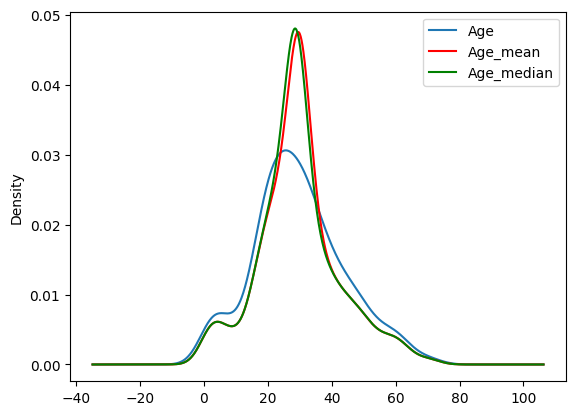

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')

X_train['Age_median'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

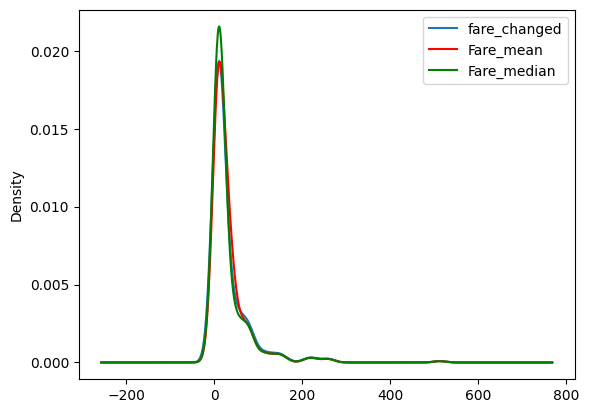

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['fare_changed'].plot(kind='kde',ax=ax)

X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')

X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [36]:
#check for changes in cov and corr
X_train.cov()

,Age,fare_changed,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,87.093581,204.349513,204.349513,75.020928,65.724497
fare_changed,87.093581,2655.937695,66.724774,69.430181,2655.937695,2655.937695
Age_mean,204.349513,66.724774,161.812625,161.812625,59.404757,52.043449
Age_median,204.349513,69.430181,161.812625,161.989566,61.813368,54.271482
Fare_mean,75.020928,2655.937695,59.404757,61.813368,2364.569003,2364.569003
Fare_median,65.724497,2655.937695,52.043449,54.271482,2364.569003,2403.437150


In [37]:
X_train.corr()

,Age,fare_changed,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.114322,1.000000,1.000000,0.100665,0.087290
fare_changed,0.114322,1.000000,0.106813,0.111145,1.000000,1.000000
Age_mean,1.000000,0.106813,1.000000,0.999454,0.096037,0.083453
Age_median,1.000000,0.111145,0.999454,1.000000,0.099876,0.086978
Fare_mean,0.100665,1.000000,0.096037,0.099876,1.000000,0.991881
Fare_median,0.087290,1.000000,0.083453,0.086978,0.991881,1.000000


<Axes: >

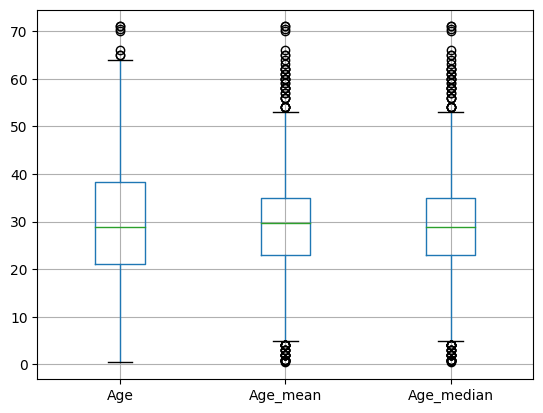

In [40]:
#we also see for boxplot
X_train[['Age','Age_mean','Age_median']].boxplot()
#outliers increased as IQR shrinked

<Axes: >

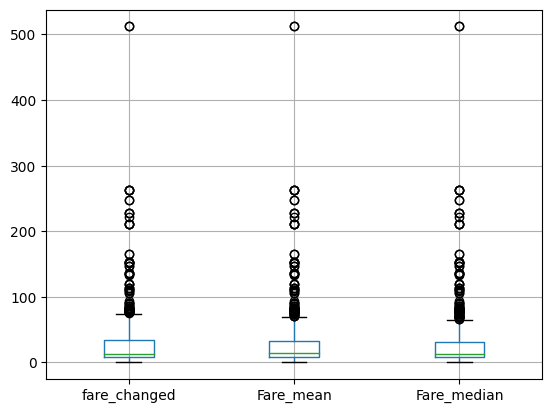

In [42]:
X_train[['fare_changed','Fare_mean','Fare_median']].boxplot()
#no change for fare
#so we can use mean median imputer for fare but not for age

In [43]:
#using sklean

In [44]:
#we can apply in two diff columns with simple imputer the two different strategy-
#-can use for missing data
#age-median and fare-mean

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [45]:
trf= ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['fare_changed'])
],remainder='passthrough')

In [46]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(),
                                 ['fare_changed'])])

In [47]:
trf.named_transformers_['imputer1'].statistics_,trf.named_transformers_['imputer2'].statistics_

(array([28.75]), array([32.9471011]))

In [48]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [49]:
#it gives value in numpy array not dataframe remember
X_train

array([[ 40.       ,  32.9471011],
       [  4.       ,  16.7      ],
       [ 47.       ,   9.       ],
       ...,
       [ 71.       ,  49.5042   ],
       [ 28.75     , 221.7792   ],
       [ 28.75     ,  32.9471011]])

In [50]:
#and always use train data for fitting and for tranforming test data also, model-
#-should be fit on train data

In [51]:
#arbitary value imputation

In [52]:
#used generally in categorical data, we replace na with missing so that ML model can
#-differentiats between observation values known and unknown
#in numeracal data put any of the value to all na, so that ML model can make difference
#disadvn-
#pdf distort, cov change, var change

In [54]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
X_train['Age_99']=X_train['Age'].fillna(99)
X_train['Age_minus1']=X_train['Age'].fillna(-1)

X_train['Fare_99']=X_train['fare_changed'].fillna(99)
X_train['Fare_minus1']=X_train['fare_changed'].fillna(-1)

In [57]:
print('original age var',X_train['Age'].var())
print('changed age_mean var',X_train['Age_99'].var())
print('changed age_median var',X_train['Age_minus1'].var())

print('original fare var',X_train['fare_changed'].var())
print('changed fare_mean var',X_train['Fare_99'].var())
print('changed fare_median var',X_train['Fare_minus1'].var())

#somuch changed but ir is done only to make difference so that ML model can differentiates

original age var 204.34951339046142
changed age_mean var 951.7275570187188
changed age_median var 318.0896202624488
original fare var 2655.9376950201095
changed fare_mean var 2790.7735030467807
changed fare_median var 2477.1434060951856


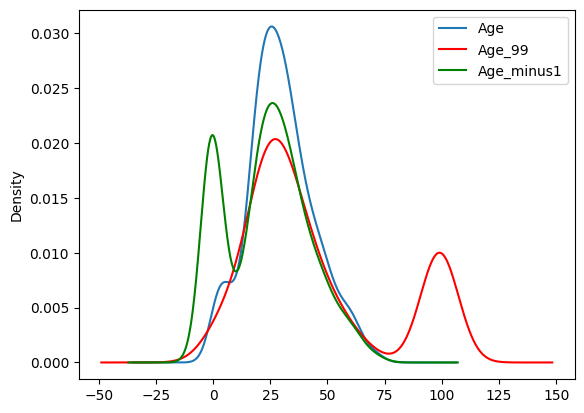

In [58]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_99'].plot(kind='kde',ax=ax,color='red')

X_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

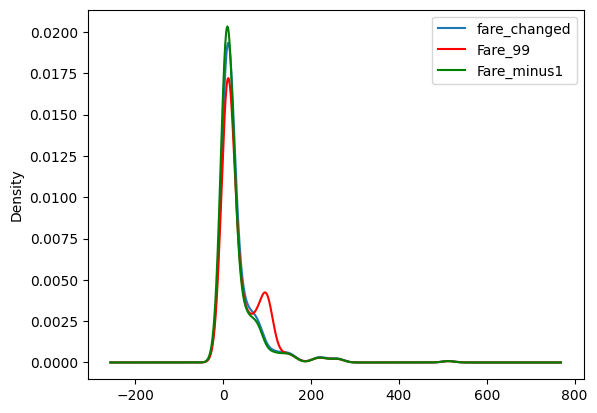

In [59]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['fare_changed'].plot(kind='kde',ax=ax)

X_train['Fare_99'].plot(kind='kde',ax=ax,color='red')

X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [60]:
 X_train.cov()

,Age,fare_changed,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,204.349513,87.093581,204.349513,204.349513,105.805158,59.199739
fare_changed,87.093581,2655.937695,-114.037377,147.126407,2655.937695,2655.937695
Age_99,204.349513,-114.037377,951.727557,-189.535540,-117.103922,-93.521347
Age_minus1,204.349513,147.126407,-189.535540,318.089620,173.133114,109.324928
Fare_99,105.805158,2655.937695,-117.103922,173.133114,2790.773503,2145.526273
Fare_minus1,59.199739,2655.937695,-93.521347,109.324928,2145.526273,2477.143406


In [62]:
 X_train.corr()

,Age,fare_changed,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.114322,1.000000,1.000000,0.132200,0.077379
fare_changed,0.114322,1.000000,-0.070812,0.164000,1.000000,1.000000
Age_99,1.000000,-0.070812,1.000000,-0.344476,-0.071854,-0.060909
Age_minus1,1.000000,0.164000,-0.344476,1.000000,0.183757,0.123160
Fare_99,0.132200,1.000000,-0.071854,0.183757,1.000000,0.816011
Fare_minus1,0.077379,1.000000,-0.060909,0.123160,0.816011,1.000000


In [73]:
#with sklearn

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=-1)

trf= ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['fare_changed'])
],remainder='passthrough')

In [75]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['fare_changed'])])

In [76]:
trf.named_transformers_['imputer1'].statistics_,trf.named_transformers_['imputer2'].statistics_

(array([99.]), array([-1.]))

In [77]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)
X_train

#we use this tech when we know that data is not missing completely at random,
#data is missing in chunks like some in starting some somewhere else

array([[ 40.    ,  -1.    ],
       [  4.    ,  16.7   ],
       [ 47.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042],
       [ 99.    , 221.7792],
       [ 99.    ,  -1.    ]])

In [78]:
#end of distribution

In [79]:
#it is extension of arbitary
#in this we replace with end value of distribution
#like if normal dist than replace by mean+3*sigma or mean-3*sigma
#if skewed then Q1-1.5*IQR or Q3+1.5*IQR

In [80]:
#use this when data is not missing at random


In [ ]:
#and random technique is applicable to both cat. and num.